In [1]:
#import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("cars.csv",sep=",")

In [3]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,mileage
0,8,307.0,130,3504,12.0,2004,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,2004,1,buick skylark 320,15.0
2,8,318.0,150,3436,11.0,2004,1,plymouth satellite,18.0
3,8,304.0,150,3433,12.0,2004,1,amc rebel sst,16.0
4,8,302.0,140,3449,10.5,2004,1,ford torino,17.0


In [5]:
#shape of data
data.shape

(398, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    int64  
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model         398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car           398 non-null    object 
 8   mileage       398 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [7]:
data.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
car             0
mileage         0
dtype: int64

In [8]:
data.describe()

,cylinders,displacement,horsepower,weight,acceleration,model,origin,mileage
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,-1404.643216,2970.424623,15.568090,2010.010050,1.572864,23.514573
std,1.701004,104.269838,12213.424763,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,-100000.000000,1613.000000,8.000000,2004.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,2007.000000,1.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,2010.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,2013.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,2016.000000,3.000000,46.600000


<AxesSubplot:>

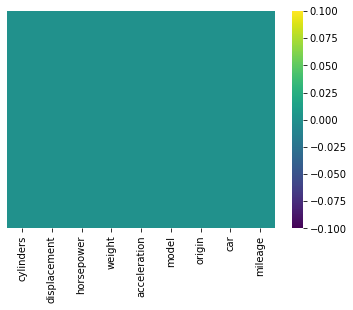

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [10]:
#columns of data
data.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model', 'origin', 'car', 'mileage'],
      dtype='object')

In [11]:
#checking for duplicated values
data.duplicated().sum()

0

In [12]:
data['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [13]:
data['model'].value_counts()

2007    40
2012    36
2010    34
2016    31
2009    30
2015    29
2014    29
2013    29
2004    29
2011    28
2006    28
2005    28
2008    27
Name: model, dtype: int64

In [14]:
data['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [15]:
data["car"].nunique()

305

In [16]:
data["car"].value_counts().head(20)

ford pinto                   6
amc matador                  5
ford maverick                5
toyota corolla               5
toyota corona                4
peugeot 504                  4
chevrolet chevette           4
chevrolet impala             4
amc hornet                   4
amc gremlin                  4
volkswagen dasher            3
chevrolet vega               3
pontiac catalina             3
plymouth duster              3
ford galaxie 500             3
ford gran torino             3
chevrolet nova               3
dodge colt                   3
chevrolet caprice classic    3
chevrolet citation           3
Name: car, dtype: int64

In [17]:
data["car"].values[:10]

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl'], dtype=object)

In [18]:
data['brand'] = data["car"].str.extract('(^.*?)\s')
data["brand"].value_counts()[:10]

ford          51
chevrolet     43
plymouth      31
amc           28
dodge         28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
Name: brand, dtype: int64

In [19]:
data['brand'] = data['brand'].replace(['volkswagen','vokswagen','vw'],'VW')
data['brand'] = data['brand'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
data['brand'] = data['brand'].replace('maxda','mazda')
data['brand'] = data['brand'].replace('toyouta','toyota')
data['brand'] = data['brand'].replace('mercedes','mercedes-benz')
data['brand'] = data['brand'].replace('nissan','datsun')
data['brand'] = data['brand'].replace('capri','ford')
data['brand'] = data['brand'].replace('nissan','datsun')

In [20]:
#Checking for any null values in brand
data[data['brand'].isnull()]

,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,mileage,brand
150,4,108.0,93,2391,15.5,2008,3,subaru,26.0,NaN
346,4,97.0,67,2065,17.8,2015,3,subaru,32.3,NaN


In [21]:
data['brand'].fillna(value = 'subaru',inplace=True) 

In [22]:
data["brand"]=data["brand"].str.capitalize()

In [23]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,mileage,brand
0,8,307.0,130,3504,12.0,2004,1,chevrolet chevelle malibu,18.0,Chevrolet
1,8,350.0,165,3693,11.5,2004,1,buick skylark 320,15.0,Buick
2,8,318.0,150,3436,11.0,2004,1,plymouth satellite,18.0,Plymouth
3,8,304.0,150,3433,12.0,2004,1,amc rebel sst,16.0,Amc
4,8,302.0,140,3449,10.5,2004,1,ford torino,17.0,Ford


In [24]:
def country(x):
    if x==1:
        return "USA"
    elif x==2:
        return "Europe"
    elif x==3:
        return "Japan"

In [25]:
data["origin"]=data["origin"].apply(country)

In [26]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,mileage,brand
0,8,307.0,130,3504,12.0,2004,USA,chevrolet chevelle malibu,18.0,Chevrolet
1,8,350.0,165,3693,11.5,2004,USA,buick skylark 320,15.0,Buick
2,8,318.0,150,3436,11.0,2004,USA,plymouth satellite,18.0,Plymouth
3,8,304.0,150,3433,12.0,2004,USA,amc rebel sst,16.0,Amc
4,8,302.0,140,3449,10.5,2004,USA,ford torino,17.0,Ford


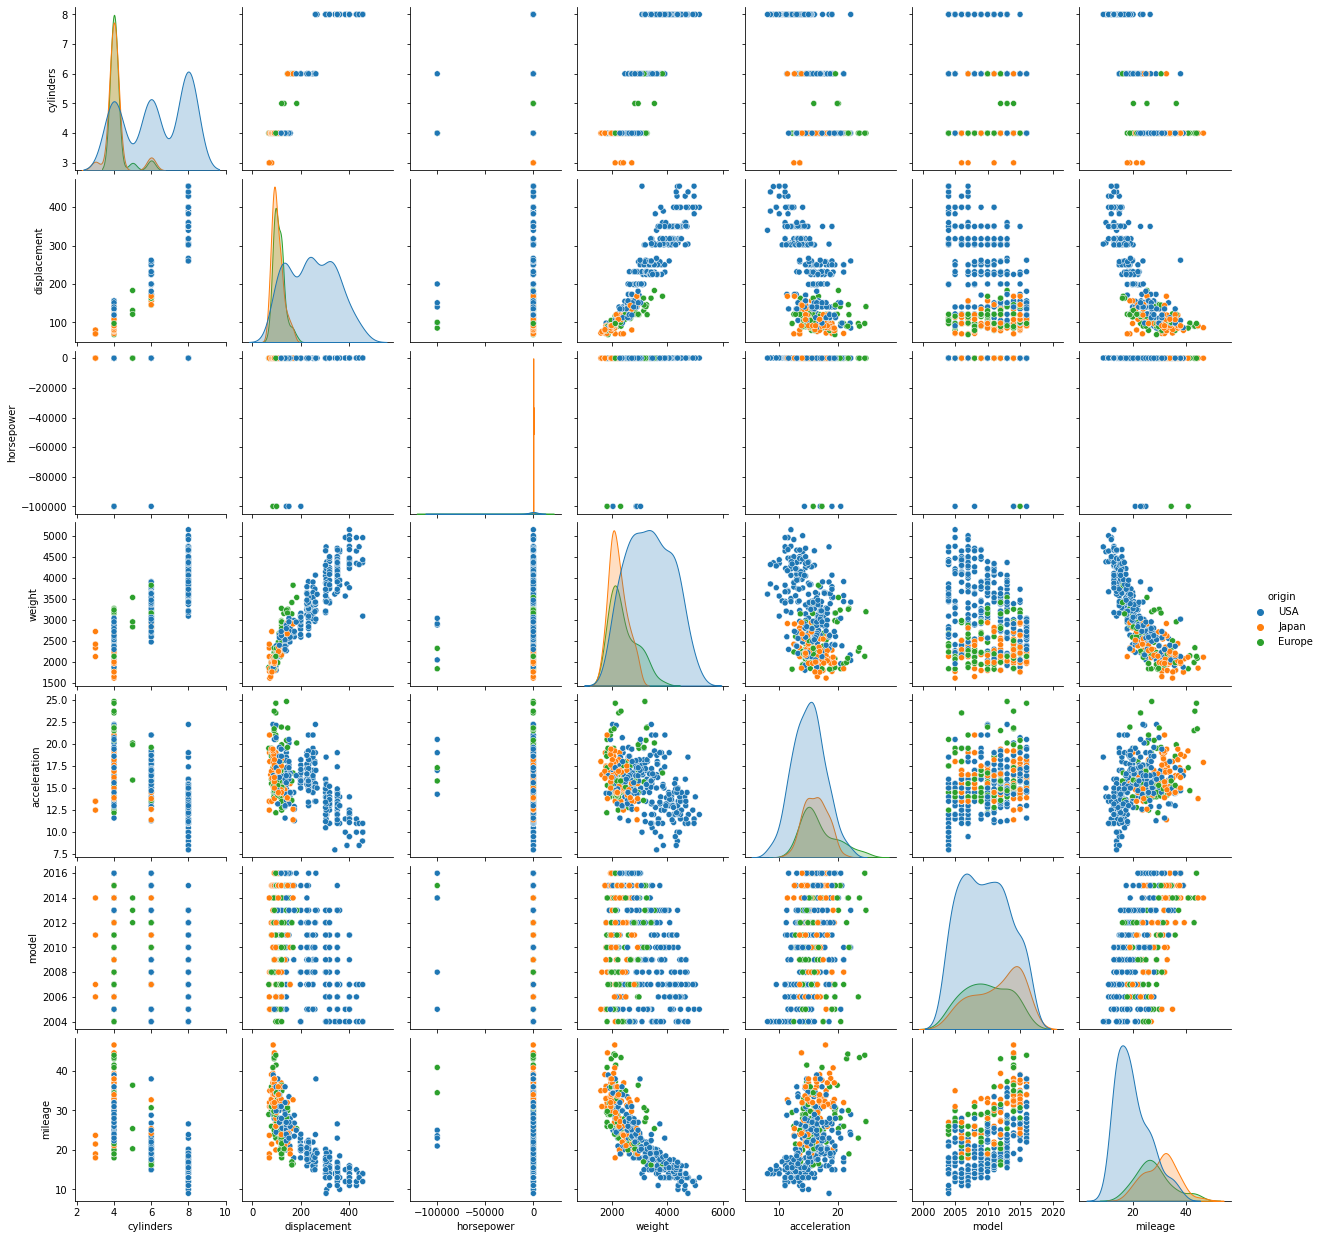

In [27]:
sns.pairplot(data,hue="origin")

<AxesSubplot:>

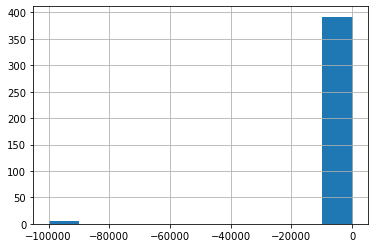

In [28]:
#Distribution of horsepower for all cars
data["horsepower"].hist()

In [29]:
#Range of horsepower
print("minimum value: {} \nmaximum value : {}".format(data["horsepower"].min(),data.horsepower.max()))

minimum value: -100000 
maximum value : 230


In [30]:
data[data["horsepower"]<=0]

,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,mileage,brand
32,4,98.0,-100000,2046,19.0,2005,USA,ford pinto,25.0,Ford
126,6,200.0,-100000,2875,17.0,2008,USA,ford maverick,21.0,Ford
330,4,85.0,-100000,1835,17.3,2014,Europe,renault lecar deluxe,40.9,Renault
336,4,140.0,-100000,2905,14.3,2014,USA,ford mustang cobra,23.6,Ford
354,4,100.0,-100000,2320,15.8,2015,Europe,renault 18i,34.5,Renault
374,4,151.0,-100000,3035,20.5,2016,USA,amc concord dl,23.0,Amc


In [31]:
data[data["car"]=="ford pinto"]

,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,mileage,brand
32,4,98.0,-100000,2046,19.0,2005,USA,ford pinto,25.0,Ford
112,4,122.0,85,2310,18.5,2007,USA,ford pinto,19.0,Ford
130,4,122.0,80,2451,16.5,2008,USA,ford pinto,26.0,Ford
168,4,140.0,83,2639,17.0,2009,USA,ford pinto,23.0,Ford
174,6,171.0,97,2984,14.5,2009,USA,ford pinto,18.0,Ford
206,4,140.0,72,2565,13.6,2010,USA,ford pinto,26.5,Ford


In [32]:
data[data["car"]=="ford maverick"]

,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,mileage,brand
17,6,200.0,85,2587,16.0,2004,USA,ford maverick,21.0,Ford
100,6,250.0,88,3021,16.5,2007,USA,ford maverick,18.0,Ford
126,6,200.0,-100000,2875,17.0,2008,USA,ford maverick,21.0,Ford
155,6,250.0,72,3158,19.5,2009,USA,ford maverick,15.0,Ford
193,6,200.0,81,3012,17.6,2010,USA,ford maverick,24.0,Ford


In [33]:
data[data["car"]=="renault 18i"]

,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,mileage,brand
354,4,100.0,-100000,2320,15.8,2015,Europe,renault 18i,34.5,Renault


In [34]:
data[data["brand"]=="Renault"]

,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,mileage,brand
79,4,96.0,69,2189,18.0,2006,Europe,renault 12 (sw),26.0,Renault
186,4,101.0,83,2202,15.3,2010,Europe,renault 12tl,27.0,Renault
218,4,79.0,58,1825,18.6,2011,Europe,renault 5 gtl,36.0,Renault
330,4,85.0,-100000,1835,17.3,2014,Europe,renault lecar deluxe,40.9,Renault
354,4,100.0,-100000,2320,15.8,2015,Europe,renault 18i,34.5,Renault


In [35]:
cars=data[data["horsepower"]<=0]["car"].unique()
cars

array(['ford pinto', 'ford maverick', 'renault lecar deluxe',
       'ford mustang cobra', 'renault 18i', 'amc concord dl'],
      dtype=object)

In [36]:

for car in cars:
    med=0
    brand=data[data["car"]==cars[3]]["brand"].values
    med=data.loc[(data["car"]==car) & (data["horsepower"]>0),"horsepower"].median()
   
    data.loc[(data["car"]==car) & (data["horsepower"]<=0),"horsepower"]=np.nan
    data.fillna(med,inplace=True)
    med_brand=data.loc[(data["brand"]==brand[0]) & (data["horsepower"]>0),"horsepower"].median()
    data.fillna(med_brand,inplace=True)

In [37]:
data[data["car"]=="ford maverick"]

,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,mileage,brand
17,6,200.0,85.0,2587,16.0,2004,USA,ford maverick,21.0,Ford
100,6,250.0,88.0,3021,16.5,2007,USA,ford maverick,18.0,Ford
126,6,200.0,83.0,2875,17.0,2008,USA,ford maverick,21.0,Ford
155,6,250.0,72.0,3158,19.5,2009,USA,ford maverick,15.0,Ford
193,6,200.0,81.0,3012,17.6,2010,USA,ford maverick,24.0,Ford


In [38]:
data[data["horsepower"]<=0]
#All outliers have been either filled with their car's median value 

,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,mileage,brand


In [39]:
#or if the car has only single row then it has been filled with the their Brand's median value
data[data["car"]=="renault 18i"]

,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,mileage,brand
354,4,100.0,89.0,2320,15.8,2015,Europe,renault 18i,34.5,Renault


*Cars with brand name as "renault"*

In [40]:
data[data["brand"]=="Renault"]

,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,mileage,brand
79,4,96.0,69.0,2189,18.0,2006,Europe,renault 12 (sw),26.0,Renault
186,4,101.0,83.0,2202,15.3,2010,Europe,renault 12tl,27.0,Renault
218,4,79.0,58.0,1825,18.6,2011,Europe,renault 5 gtl,36.0,Renault
330,4,85.0,89.0,1835,17.3,2014,Europe,renault lecar deluxe,40.9,Renault
354,4,100.0,89.0,2320,15.8,2015,Europe,renault 18i,34.5,Renault


<AxesSubplot:>

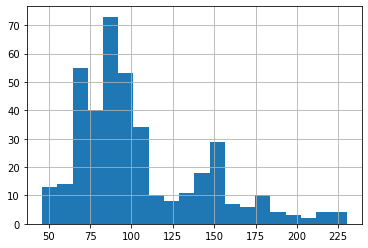

In [41]:
data["horsepower"].hist(bins=20)

In [42]:
plt.figure(figsize=(20,8))
brands_USA=data[data["origin"]=="USA"]["brand"]
brands_Europe=data[data["origin"]=="Europe"]["brand"]
brands_Japan=data[data["origin"]=="Japan"]["brand"]
brand_origin=pd.DataFrame([["USA",brands_USA.nunique()],["Europe",brands_Europe.nunique()],["Japan",brands_Japan.nunique()]],
                          columns=["Origin Country","Total no. of brands"])
brand_origin

,Origin Country,Total no. of brands
0,USA,12
1,Europe,11
2,Japan,5


<Figure size 1440x576 with 0 Axes>

<AxesSubplot:>

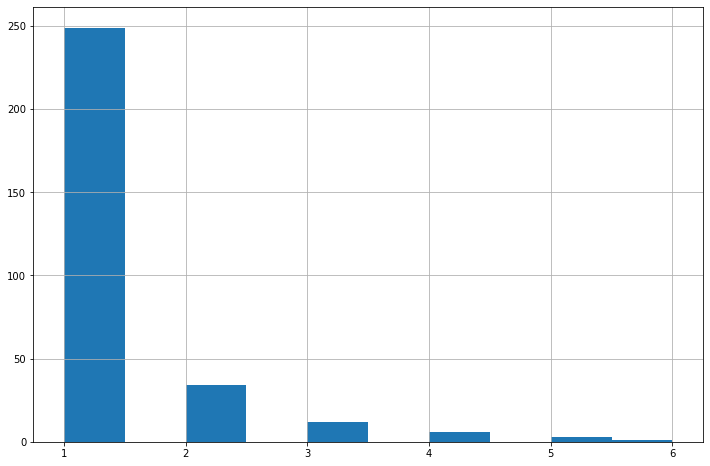

In [43]:
plt.figure(figsize=(12,8))
data["car"].value_counts().hist()


In [44]:
data["car"].nunique()

305

In [45]:
data.drop("car",axis=1,inplace=True)

In [46]:
data.corr()

,cylinders,displacement,horsepower,weight,acceleration,model,mileage
cylinders,1.000000,0.950721,0.841842,0.896017,-0.505419,-0.348746,-0.775396
displacement,0.950721,1.000000,0.896334,0.932824,-0.543684,-0.370164,-0.804203
horsepower,0.841842,0.896334,1.000000,0.863053,-0.687740,-0.413533,-0.773662
weight,0.896017,0.932824,0.863053,1.000000,-0.417457,-0.306564,-0.831741
acceleration,-0.505419,-0.543684,-0.687740,-0.417457,1.000000,0.288137,0.420289
model,-0.348746,-0.370164,-0.413533,-0.306564,0.288137,1.000000,0.579267
mileage,-0.775396,-0.804203,-0.773662,-0.831741,0.420289,0.579267,1.000000


In [47]:
#Setting palette
sns.set_palette("bright")

In [48]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model,origin,mileage,brand
0,8,307.0,130.0,3504,12.0,2004,USA,18.0,Chevrolet
1,8,350.0,165.0,3693,11.5,2004,USA,15.0,Buick
2,8,318.0,150.0,3436,11.0,2004,USA,18.0,Plymouth
3,8,304.0,150.0,3433,12.0,2004,USA,16.0,Amc
4,8,302.0,140.0,3449,10.5,2004,USA,17.0,Ford


<AxesSubplot:title={'center':'Number of cars according to Origin'}, xlabel='origin', ylabel='count'>

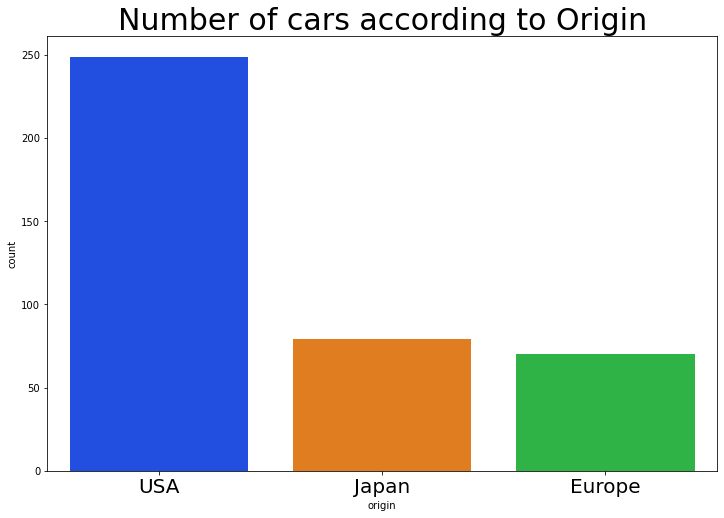

In [49]:
plt.figure(figsize=(12,8))
plt.title("Number of cars according to Origin",fontsize=30)
plt.xticks(fontsize=20)
sns.countplot(data["origin"])


<AxesSubplot:title={'center':'Number of cars according to Total no. of Cylinders present'}, xlabel='cylinders', ylabel='count'>

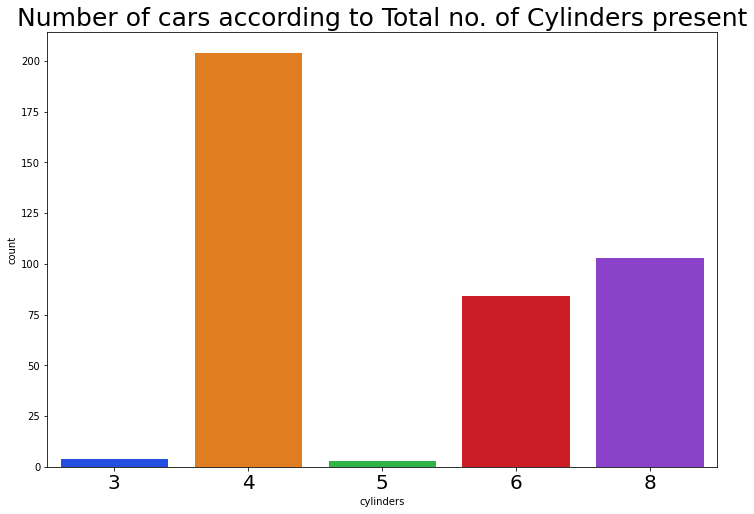

In [50]:
plt.figure(figsize=(12,8))
plt.title("Number of cars according to Total no. of Cylinders present",fontsize=25)
plt.xticks(fontsize=20)
sns.countplot(data["cylinders"])

<AxesSubplot:title={'center':'Total number of cars according to Number of Cylinders in each Origin'}, xlabel='cylinders', ylabel='count'>

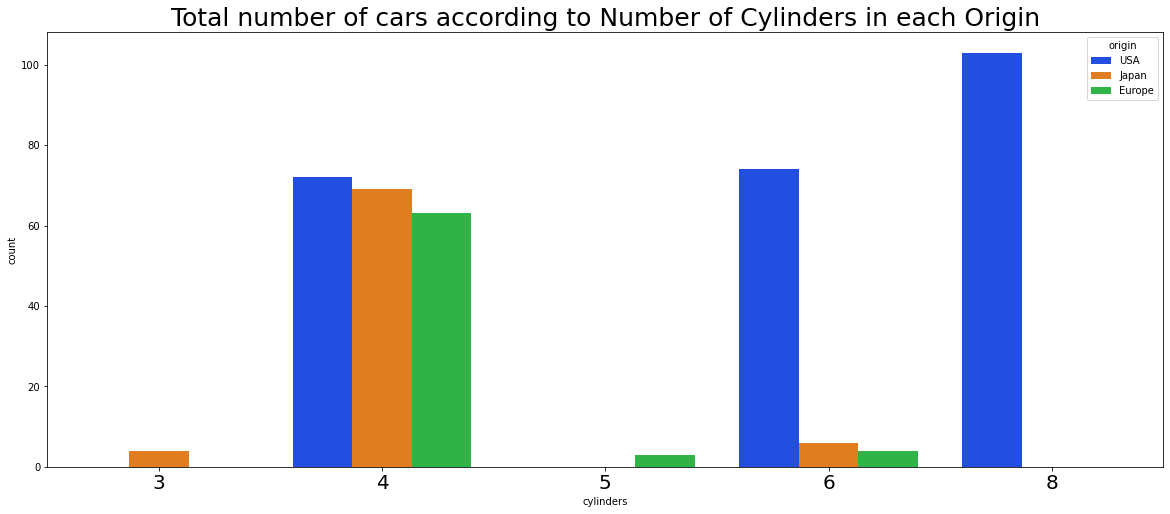

In [51]:
plt.figure(figsize=(20,8))
plt.title("Total number of cars according to Number of Cylinders in each Origin",fontsize=25)
plt.xticks(fontsize=20)
sns.countplot(x="cylinders",data=data,hue="origin")

<AxesSubplot:>

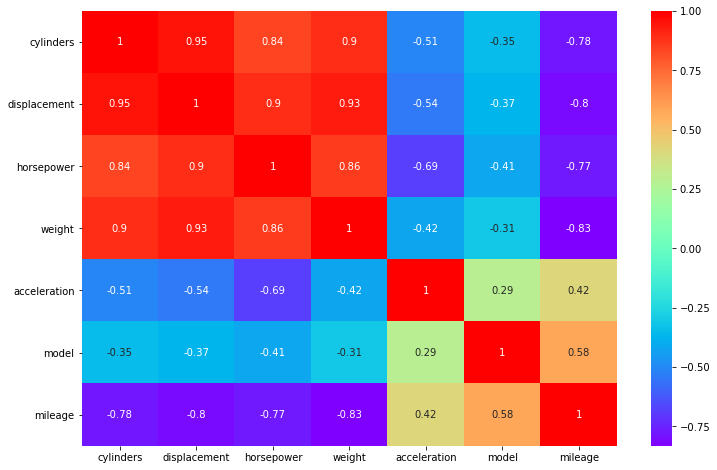

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap="rainbow")

<Figure size 864x576 with 0 Axes>

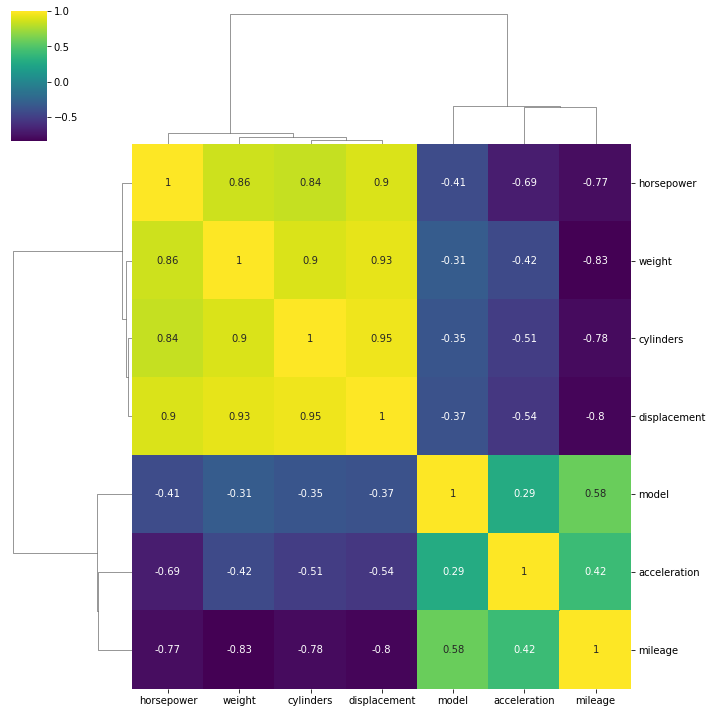

In [53]:
plt.figure(figsize=(12,8))
sns.clustermap(data.corr(),cmap="viridis",annot=True)

In [54]:
#Dependent variable

y=data.iloc[:,7].values

In [55]:
#Independent variable

x=data.drop("mileage",axis=1).values

In [56]:
x[:10]

array([[8, 307.0, 130.0, 3504, 12.0, 2004, 'USA', 'Chevrolet'],
       [8, 350.0, 165.0, 3693, 11.5, 2004, 'USA', 'Buick'],
       [8, 318.0, 150.0, 3436, 11.0, 2004, 'USA', 'Plymouth'],
       [8, 304.0, 150.0, 3433, 12.0, 2004, 'USA', 'Amc'],
       [8, 302.0, 140.0, 3449, 10.5, 2004, 'USA', 'Ford'],
       [8, 429.0, 198.0, 4341, 10.0, 2004, 'USA', 'Ford'],
       [8, 454.0, 220.0, 4354, 9.0, 2004, 'USA', 'Chevrolet'],
       [8, 440.0, 215.0, 4312, 8.5, 2004, 'USA', 'Plymouth'],
       [8, 455.0, 225.0, 4425, 10.0, 2004, 'USA', 'Pontiac'],
       [8, 390.0, 190.0, 3850, 8.5, 2004, 'USA', 'Amc']], dtype=object)

In [57]:
y[:10]

array([18., 15., 18., 16., 17., 15., 14., 14., 14., 15.])

In [58]:
x.shape

(398, 8)

In [59]:
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0,6])],
                    remainder="passthrough")
x_s=np.array(ct.fit_transform(x))
x_s[29]


array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 97.0, 88.0, 2130, 14.5,
       2005, 'Datsun'], dtype=object)

In [60]:
x_s[:,8:]

array([[307.0, 130.0, 3504, 12.0, 2004, 'Chevrolet'],
       [350.0, 165.0, 3693, 11.5, 2004, 'Buick'],
       [318.0, 150.0, 3436, 11.0, 2004, 'Plymouth'],
       ...,
       [135.0, 84.0, 2295, 11.6, 2016, 'Dodge'],
       [120.0, 79.0, 2625, 18.6, 2016, 'Ford'],
       [119.0, 82.0, 2720, 19.4, 2016, 'Chevrolet']], dtype=object)

In [61]:
le_brand=LabelEncoder()
le_year=LabelEncoder()
x_s[:,13]=le_brand.fit_transform(x_s[:,13].astype(str))
x_s[:,12]=le_year.fit_transform(x_s[:,12])
x_s[:2]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 307.0, 130.0, 3504, 12.0,
        0, 5],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 350.0, 165.0, 3693, 11.5,
        0, 3]], dtype=object)

In [62]:
newdata=pd.DataFrame(x_s,columns=["3","4","5","6","8","Europe","Japan","USA","displacement","horsepower","weight","acceleration","model","brand"])
newdata.head()

,3,4,5,6,8,Europe,Japan,USA,displacement,horsepower,weight,acceleration,model_year,brand
0,0,0,0,0,1,0,0,1,307,130,3504,12,0,5
1,0,0,0,0,1,0,0,1,350,165,3693,11.5,0,3
2,0,0,0,0,1,0,0,1,318,150,3436,11,0,19
3,0,0,0,0,1,0,0,1,304,150,3433,12,0,0
4,0,0,0,0,1,0,0,1,302,140,3449,10.5,0,10


In [63]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.3,random_state=101)

In [64]:
x_train

array([[0.0, 0.0, 0.0, ..., 13.0, 1, 19],
       [0.0, 1.0, 0.0, ..., 14.0, 1, 24],
       [0.0, 1.0, 0.0, ..., 14.5, 8, 8],
       ...,
       [0.0, 1.0, 0.0, ..., 17.0, 10, 12],
       [0.0, 0.0, 0.0, ..., 8.0, 0, 19],
       [0.0, 1.0, 0.0, ..., 16.2, 11, 10]], dtype=object)

In [65]:
x_test.shape

(120, 14)

In [66]:
x_train[:2]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 318.0, 150.0, 4096, 13.0,
        1, 19],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 113.0, 95.0, 2228, 14.0,
        1, 24]], dtype=object)

In [67]:
x_train_scaled=x_train
x_test_scaled=x_test

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled[:,8:12]=sc.fit_transform(x_train_scaled[:,8:12])
x_test_scaled[:,8:12]=sc.transform(x_test_scaled[:,8:12])
x_train_scaled

array([[0.0, 0.0, 0.0, ..., -0.9477638194514814, 1, 19],
       [0.0, 1.0, 0.0, ..., -0.5852454625341561, 1, 24],
       [0.0, 1.0, 0.0, ..., -0.4039862840754934, 8, 8],
       ...,
       [0.0, 1.0, 0.0, ..., 0.5023096082178199, 10, 12],
       [0.0, 0.0, 0.0, ..., -2.760355604038108, 0, 19],
       [0.0, 1.0, 0.0, ..., 0.21229492268395941, 11, 10]], dtype=object)

In [69]:
x_train

array([[0.0, 0.0, 0.0, ..., -0.9477638194514814, 1, 19],
       [0.0, 1.0, 0.0, ..., -0.5852454625341561, 1, 24],
       [0.0, 1.0, 0.0, ..., -0.4039862840754934, 8, 8],
       ...,
       [0.0, 1.0, 0.0, ..., 0.5023096082178199, 10, 12],
       [0.0, 0.0, 0.0, ..., -2.760355604038108, 0, 19],
       [0.0, 1.0, 0.0, ..., 0.21229492268395941, 11, 10]], dtype=object)

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.3,random_state=101)

In [71]:
#random forest implementation
randomforest=RandomForestRegressor()
randomforest.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
P_forest=randomforest.predict(x_test)

In [73]:
rf_score=r2_score(y_test,P_forest)*100
rf_mse=mean_squared_error(y_test,P_forest)

In [74]:
rf_score

90.13584949697778

In [75]:
#decision tree implementation
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [76]:
P_dec=dt.predict(x_test)

In [77]:
dt_score=r2_score(y_test,P_dec)*100
dt_mse = mean_squared_error(y_test,P_dec)

In [78]:
dt_score

82.47319469046542

In [79]:
#linear regression implementation
Linreg=LinearRegression()
Linreg.fit(x_train,y_train)

LinearRegression()

In [80]:
P_linreg=Linreg.predict(x_test)

In [81]:
lg_score=r2_score(y_test,P_linreg)*100
lg_mse=mean_squared_error(y_test,P_linreg)

In [82]:
lg_score

85.21942054278503

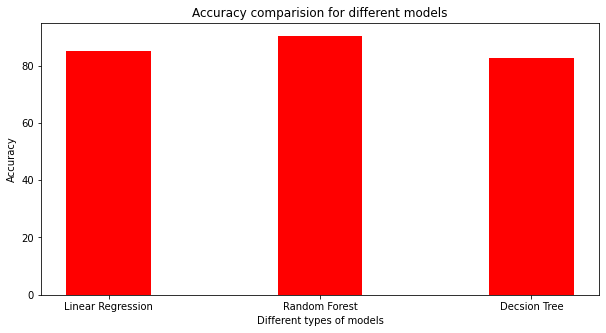

In [83]:
data = {'Linear Regression':85.219, 'Random Forest':90.329, 'Decsion Tree':82.473} 
models = list(data.keys()) 
accuracy = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(models, accuracy, color ='red',  
        width = 0.4) 
  
plt.xlabel("Different types of models") 
plt.ylabel("Accuracy") 
plt.title("Accuracy comparision for different models") 
plt.show() 

In [88]:
np.sqrt(lg_mse)

3.0435899610274624

In [89]:
np.sqrt(rf_mse)

2.486395766633566

In [90]:
np.sqrt(dt_mse)

3.3142998255036216

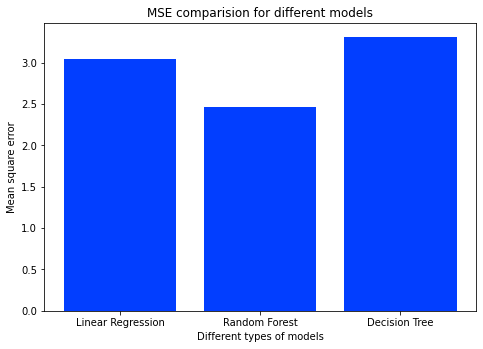

In [85]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Linear Regression', 'Random Forest', 'Decision Tree']
mse = [3.043,2.461,3.314]
plt.title("MSE comparision for different models") 
plt.xlabel("Different types of models") 
plt.ylabel("Mean square error") 
ax.bar(model,mse)
plt.show()